# pyMapVBVD Demo

#### Imports

In [1]:
%load_ext autoreload
%autoreload 2
from mapVBVD import mapVBVD
import numpy as np

#### Load VB file

In [2]:
vbfile = 'tests/test_data/meas_MID311_STEAM_wref1_FID115674.dat'
twixObj = mapVBVD.mapVBVD(vbfile)

Software version: VB
TODO
UTC: TODO
526464
Scan 1/1, read all mdhs:
14.00 % read in 0.00 s;
estimated time left: 0.00 s

43.00 % read in 0.00 s;
estimated time left: 0.00 s

71.00 % read in 0.00 s;
estimated time left: 0.00 s

     3.5MB read in    0 s



#### Show file contents

In [3]:
mdh_flags = twixObj.MDH_flags()
for mdh in mdh_flags:
    print(f'MDH: {mdh}')
    print(twixObj[mdh])
    print('\n')

MDH: image
***twix_map_obj***
File: tests/test_data/meas_MID311_STEAM_wref1_FID115674.dat
Software: vb
Number of acquisitions read 2
Data size is [4096,32,1,1,1,1,1,1,2,1,1,1,1,1,1,1]
Squeezed data size is [4096,32,2] (['Col', 'Cha', 'Rep'])
NCol = 4096
NCha = 32
NLin  = 1
NAve  = 1
NSli  = 1
NPar  = 1
NEco  = 1
NPhs  = 1
NRep  = 2
NSet  = 1
NSeg  = 1
NIda  = 1
NIdb  = 1
NIdc  = 1
NIdd  = 1
NIde  = 1


MDH: phasecor
***twix_map_obj***
File: tests/test_data/meas_MID311_STEAM_wref1_FID115674.dat
Software: vb
Number of acquisitions read 1
Data size is [4096,32,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
Squeezed data size is [4096,32] (['Col', 'Cha'])
NCol = 4096
NCha = 32
NLin  = 1
NAve  = 1
NSli  = 1
NPar  = 1
NEco  = 1
NPhs  = 1
NRep  = 1
NSet  = 1
NSeg  = 1
NIda  = 1
NIdb  = 1
NIdc  = 1
NIdd  = 1
NIde  = 1




#### View data

In [36]:
aa = np.random.randn(10,10)
aa[:,[1,3,5]].shape

(10, 3)

(4096, 32, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1)
(4096, 32, 2)
(2000, 8)
(4096, 32, 2)


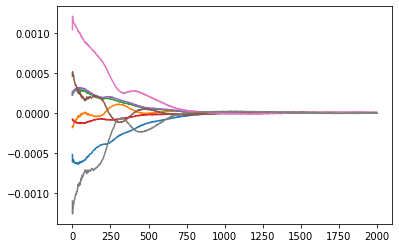

In [86]:
# You can retrieve all of the data
twixObj.image.squeeze = False
out = twixObj.image['']
print(out.shape)

# Which can be squeezed
twixObj.image.squeeze = True
out = twixObj.image['']
print(out.shape)

# Or you can select a subset of the data
twixObj.image.squeeze = True
out = twixObj.image[0:2000,0:31:4,1]
print(out.shape)

# Or you can retrieve the unsorted data (not very interesting in this example)
out_unsorted = twixObj.image.unsorted()
print(out_unsorted.shape)

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.real(out))
plt.show()

#### View header information

In [88]:
found_keys = twixObj.search_header_for_keys(('TXSPEC', 'asNucleusInfo'),top_lvl=['MeasYaps','Phoenix'])

MeasYaps:
	('sTXSPEC', 'asNucleusInfo', '0', 'tNucleus'): "1H"
	('sTXSPEC', 'asNucleusInfo', '0', 'lFrequency'): 297219948.0
	('sTXSPEC', 'asNucleusInfo', '0', 'flReferenceAmplitude'): 225.0
	('sTXSPEC', 'asNucleusInfo', '0', 'flAmplitudeCorrection'): 1.0
	('sTXSPEC', 'asNucleusInfo', '1', 'flAmplitudeCorrection'): 1.0
	('sTXSPEC', 'asNucleusInfo', '1', 'lRFPAIndex'): -1.0
Phoenix:
	('sTXSPEC', 'asNucleusInfo', '0', 'tNucleus'): "1H"
	('sTXSPEC', 'asNucleusInfo', '0', 'lFrequency'): 297219948.0
	('sTXSPEC', 'asNucleusInfo', '0', 'bFrequencyValid'): 1.0
	('sTXSPEC', 'asNucleusInfo', '0', 'flReferenceAmplitude'): 225.0
	('sTXSPEC', 'asNucleusInfo', '0', 'bReferenceAmplitudeValid'): 1.0
	('sTXSPEC', 'asNucleusInfo', '0', 'flAmplitudeCorrection'): 1.0
	('sTXSPEC', 'asNucleusInfo', '0', 'bAmplitudeCorrectionValid'): 1.0
	('sTXSPEC', 'asNucleusInfo', '0', 'bRFPAIndexValid'): 1.0
	('sTXSPEC', 'asNucleusInfo', '1', 'bFrequencyValid'): 1.0
	('sTXSPEC', 'asNucleusInfo', '1', 'bReferenceAmplitude

In [90]:
value = twixObj.search_header_for_val('MeasYaps',('sTXSPEC', 'asNucleusInfo', '0', 'tNucleus'))
print(value)

['"1H"']
